In [1]:
from scholarly import scholarly
from scholarly import ProxyGenerator
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
pg = ProxyGenerator()
pg.FreeProxies()
scholarly.use_proxy(pg)

In [26]:
# create an empty dataframe and list authors and years they started at the IMHR
Allpubs = pd.DataFrame({"Author": [], "Title":[], "Year":[]}) 

scientists = {'Lauri Tuominen': 2018, 'Synthia Guimond': 2018, 'Sara Tremblay': 2018, 'Robyn McQuaid': 2018,
             'Clifford Cassidy': 2016, 'Natalia Jaworska': 2018, 'Jennifer L. Phillips' : 2007 , 'Georg Northoff': 2009,
            'Michael Seto' : 2009 , 'Michael Bodnar': 2018, 'Stuart Fogel': 2017, 'Rebecca Robillard': 2018,
             'Zachary Kaminsky': 2018}

In [30]:
# go over all scientists and extract all publications from google scholar 
for scientist in scientists.keys(): 
    pubs = pd.DataFrame({"Author": [], "Title":[], "Year":[]}) 
    search_query = scholarly.search_author(scientist)
    author = scholarly.fill(next(search_query))

    for pub in author['publications']:
        if not 'title' in pub['bib']:
            title = np.nan
        else: 
            title = pub['bib']['title']

        if not 'pub_year' in pub['bib']:
            year = np.nan
        else: 
            year = round(int(pub['bib']['pub_year']),0)

        new_row = {"Author":scientist, "Title": title, "Year": year}
        pubs = pd.concat([pubs, pd.DataFrame([new_row])], ignore_index=True)
    # remove publications before start year 
    pubs = pubs.drop(pubs[pubs.Year < scientists[scientist]].index)
    
    Allpubs = pd.concat([Allpubs, pubs], ignore_index=True)


In [33]:
Allpubs.to_csv('allpubs.cvs')


In [34]:
Allpubs

,Author,Title,Year
0,Lauri Tuominen,Opioid system and human emotions,2018.0
1,Lauri Tuominen,Opioid release after high-intensity interval t...,2018.0
2,Lauri Tuominen,μ-opioid receptor system mediates reward proce...,2018.0
3,Lauri Tuominen,Mapping neurotransmitter systems to the struct...,2022.0
4,Lauri Tuominen,Sex difference in brain CB1 receptor availabil...,2019.0
...,...,...,...
1412,Zachary Kaminsky,The epigenetics of alcohol use disorder: resul...,2019.0
1413,Zachary Kaminsky,SA68SUICIDE-ASSOCIATED DNA METHYLATION CHANGES...,2019.0
1414,Zachary Kaminsky,EPIGENOME-WIDE ASSOCIATION ANALYSIS AND REPLIC...,2019.0
1415,Zachary Kaminsky,S257. Whole Epigenome Analysis and Replication...,2018.0


In [35]:
# remove publications that have a NaN, or that are dublicates (i.e. many authors from the Royal)
Allpubs = Allpubs.dropna()
Allpubs = Allpubs.drop_duplicates(subset=['Title'])

# Count number of publications per year, pivot and fix years into integers  
result = Allpubs.groupby(['Author', 'Year']).size().reset_index(name='count')
result = result.pivot(index='Year', columns='Author', values='count')
result.index = result.index.astype(int)

In [36]:
# reorder based on most publications 
name_totals = result.sum(axis=0)
result = result[name_totals.sort_values(ascending=False).index]
result

Author,Georg Northoff,Michael Seto,Stuart Fogel,Rebecca Robillard,Jennifer L. Phillips,Natalia Jaworska,Synthia Guimond,Clifford Cassidy,Zachary Kaminsky,Lauri Tuominen,Robyn McQuaid,Sara Tremblay,Michael Bodnar
Year,,,,,,,,,,,,,
2007,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,21.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,37.0,7.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,24.0,10.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,30.0,14.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,40.0,7.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,49.0,14.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,33.0,26.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,63.0,16.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


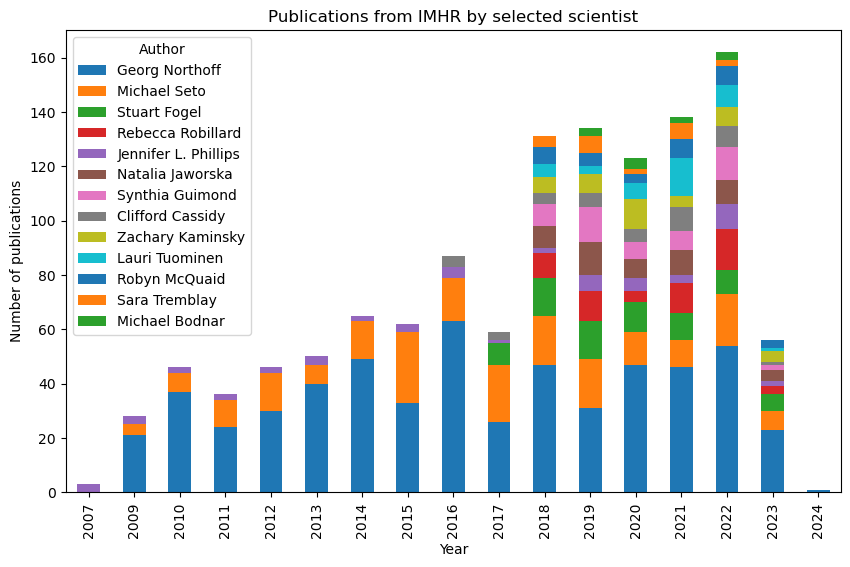

In [37]:
#
#plt.bar(result, stacked=True)

result.plot(kind='bar', stacked=True,  figsize=(10, 6))

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.ylabel('Number of publications')
plt.grid(False)
plt.title('Publications from IMHR by selected scientist')
#plt.show()
plt.savefig('/Users/laurituominen/Desktop/IMHR_publications.png')